For unknow reson, I can't load generator model directly. So I load gan model and get the second layer as the model.

In [1]:
import numpy as np
import random

from keras.layers import Input,merge
from keras.layers.core import Reshape, Dense, Dropout, Activation, Flatten
from keras.layers.advanced_activations import LeakyReLU
from keras.layers.convolutional import Cropping2D, Convolution2D, Deconvolution2D
from keras.layers.normalization import BatchNormalization
from keras.optimizers import Adam, SGD
import keras
from keras.models import Model

from tqdm import tqdm


Using Theano backend.
Using gpu device 0: GeForce GTX 950 (CNMeM is enabled with initial size: 80.0% of memory, cuDNN 5105)
/home/yiyuezhuo/anaconda3/lib/python3.6/site-packages/theano/sandbox/cuda/__init__.py:600: UserWarning: Your cuDNN version is more recent than the one Theano officially supports. If you see any problems, try updating Theano or downgrading cuDNN to version 5.
  warnings.warn(warn)


In [2]:
from sklearn.externals import joblib
import numpy as np


In [9]:
from keras.models import load_model



In [11]:
generator, discriminator, gan, generator_optimizer, discriminator_optimizer = build_models()


____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
input_5 (InputLayer)             (None, 100)           0                                            
____________________________________________________________________________________________________
dense_5 (Dense)                  (None, 9216)          930816      input_5[0][0]                    
____________________________________________________________________________________________________
batchnormalization_8 (BatchNorma (None, 9216)          36864       dense_5[0][0]                    
____________________________________________________________________________________________________
leakyrelu_13 (LeakyReLU)         (None, 9216)          0           batchnormalization_8[0][0]       
___________________________________________________________________________________________

In [15]:
gan = load_model('gan.model')

INFO (theano.gof.compilelock): Refreshing lock /home/yiyuezhuo/.theano/compiledir_Linux-4.4--generic-x86_64-with-debian-stretch-sid-x86_64-3.6.0-64/lock_dir/lock


In [20]:
gan.summary()

____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
input_4 (InputLayer)             (None, 100)           0                                            
____________________________________________________________________________________________________
model_1 (Model)                  (None, 3, 48, 48)     12128875    input_4[0][0]                    
____________________________________________________________________________________________________
model_2 (Model)                  (None, 2)             3087810     model_1[1][0]                    
Total params: 15,216,685
Trainable params: 12,110,167
Non-trainable params: 3,106,518
____________________________________________________________________________________________________


In [37]:
generator = gan.get_layer(index=1)

In [39]:
generator.name

'model_1'

In [41]:
def noise_generator(batch, size = 100) :
    # Normal (0, 1) noise instead of uniform as in original DCGAN 
    return np.random.normal(0, 1, size=[batch,100])


In [49]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
from IPython import display

import pandas as pd
#pandas used to efficiently calculate rolling_mean

def plot_loss(
    losses, 
    names = (
        'discriminator accuracy real',
        'discriminator accuracy fake',
        'discriminator logloss real',
        'discriminator logloss fake',
        'generator accuracy',
        'generator logloss',
    ),
    average_window = 100,
):
    display.clear_output(wait = True)
    display.display(plt.gcf())
    plt.figure(figsize=(12, 8))
    for name in names :
        plt.plot(
            pd.rolling_mean(pd.Series(losses[name]), window = average_window).values, 
            label = name
        )
    
    plt.legend()
    plt.show()
    
def plot_grid(images, dimensions = (5, 5), figsize=(10, 10)) :
    plt.figure(figsize=figsize)
    for i in range(images.shape[0]):
        plt.subplot(dimensions[0], dimensions[1], i + 1)
        
        # (-1, 1) color range to (0, 1)
        image = (images[i, :, :, :] + 1.0) * 0.5
        
        plt.imshow(image)
        plt.axis('off')
        
    plt.tight_layout()
    plt.show()

plot_dimensions = (5, 5)
plot_image_count = np.prod(plot_dimensions)
fixed_noise = noise_generator(plot_image_count)

def plot_generator(n_images = plot_image_count, dimensions = plot_dimensions, figsize = (10, 10), fixed_set = True):
    if fixed_set :
        noise = fixed_noise
    else :
        noise = noise_generator(plot_image_count)
        
    generated_images = generator.predict(noise)
    
    # Convert to (height, width, RGB)
    generated_images = np.swapaxes(generated_images, 1, 2)
    generated_images = np.swapaxes(generated_images, 2, 3)
    
    plot_grid(generated_images, plot_dimensions, figsize)


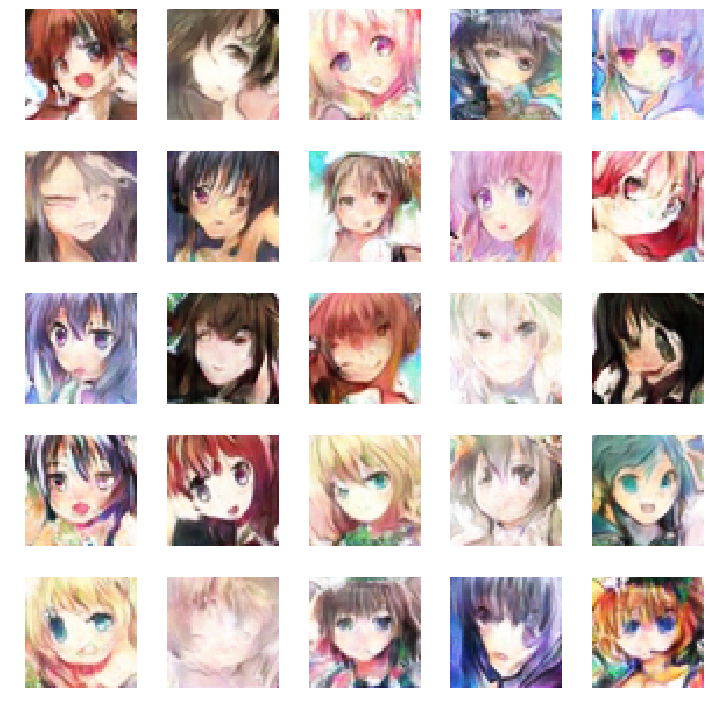

In [55]:
plot_generator(fixed_set = False)

In [56]:
np.array((5,3))*16

array([80, 48])

In [ ]:
np.array((5,3))*16